In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports and toolboxes needed for workflow
# System imports
import os
import sys

# Mathematical imports
import numpy as np
import math

# To make this notebook's output stable across runs
np.random.seed(42)

# Data structure imports
import csv
import glob
from collections import Counter # https://docs.python.org/2/library/collections.html
import re
import pandas as pd
from pandas import set_option
set_option('display.max_columns',400)


# Machine Learning and Statistical imports
import scipy
from sklearn.cluster import KMeans


# Computer Vision imports
import cv2
import PIL
from PIL import Image
from skimage.color import rgb2lab, deltaE_cie76


# Visualization imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import image as img
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rcParams['figure.figsize'] = (100,100)

import seaborn as sns

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.plotting import figure
output_notebook()

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGE_ID = "EDA_Images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", IMAGE_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Ignore useless warnings 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', DeprecationWarning)


C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Loading BokehJS ...

In [2]:
%%time
mydir='/Users/Brandon/Documents/GitHub/COMPS/Raw Data/'

def createFileList(myDir, format='.xlsx'):
    filelist = []
    print('\nCurrent Working Directory:\n', myDir, end='\n')
    
    for root, dirs, files in os.walk(myDir, topdown=False):
        for file in files:
            if file.endswith(format):
                fullName = os.path.join(root, file)
                filelist.append(fullName)
        print('\nList of SIC Data:\n', filelist, end='\n')
    return filelist

filelist = createFileList(mydir)


Current Working Directory:
 /Users/Brandon/Documents/GitHub/COMPS/Raw Data/

List of SIC Data:
 ['/Users/Brandon/Documents/GitHub/COMPS/Raw Data/SIC_0_advancesearch16784737975e1a5b2c8cbeb.xlsx', '/Users/Brandon/Documents/GitHub/COMPS/Raw Data/SIC_1_advancesearch12906045365e1a5bb125324.xlsx', '/Users/Brandon/Documents/GitHub/COMPS/Raw Data/SIC_2_advancesearch15616274825e1a5c405bce4.xlsx', '/Users/Brandon/Documents/GitHub/COMPS/Raw Data/SIC_3_advancesearch16953607965e1a5cf27817a.xlsx', '/Users/Brandon/Documents/GitHub/COMPS/Raw Data/SIC_4_advancesearch14170920915e1a5dbd6cddc.xlsx', '/Users/Brandon/Documents/GitHub/COMPS/Raw Data/SIC_5_advancesearch8208422685e1a5e4281b83.xlsx', '/Users/Brandon/Documents/GitHub/COMPS/Raw Data/SIC_6_advancesearch15668837465e1a60171bf79.xlsx', '/Users/Brandon/Documents/GitHub/COMPS/Raw Data/SIC_7_advancesearch5468595875e1a60a2066b1.xlsx', '/Users/Brandon/Documents/GitHub/COMPS/Raw Data/SIC_8_advancesearch19810233385e1a613f38c47.xlsx', '/Users/Brandon/Docume

In [3]:
%%time
# Sort and view the list of images
filelist.sort()
filelist

Wall time: 0 ns


In [4]:
%%time
sic0 = pd.concat(pd.read_excel(filelist[0], sheet_name=None), ignore_index=True)
sic1 = pd.concat(pd.read_excel(filelist[1], sheet_name=None), ignore_index=True)
sic2 = pd.concat(pd.read_excel(filelist[2], sheet_name=None), ignore_index=True)
sic3 = pd.concat(pd.read_excel(filelist[3], sheet_name=None), ignore_index=True)
sic4 = pd.concat(pd.read_excel(filelist[4], sheet_name=None), ignore_index=True)
sic5 = pd.concat(pd.read_excel(filelist[5], sheet_name=None), ignore_index=True)
sic6 = pd.concat(pd.read_excel(filelist[6], sheet_name=None), ignore_index=True)
sic7 = pd.concat(pd.read_excel(filelist[7], sheet_name=None), ignore_index=True)
sic8 = pd.concat(pd.read_excel(filelist[8], sheet_name=None), ignore_index=True)
sic9 = pd.concat(pd.read_excel(filelist[9], sheet_name=None), ignore_index=True)

Wall time: 15.7 s


In [5]:
sic0

,Auditors,Company Name,Company Type,D-U-N-S@ Number,Domestic Parent Duns No,Domestic Parent Name,Employee All Sites,Employee this Site,Employees Total (Year 1),Employer ID Number (EIN),Facility Size,Fax No,Former Name,Global Duns No,Global Name,Immediate Parent Duns No,Immediate Parent Name,Import/Export,Latitude,Line of Business,Location Type,Longtitude,Mailing Address,Mailing City,Mailing Country,Mailing County,Mailing State,Mailing Zipcode,Manufacturing Indicator,Marketing Prescreen Ranking,Marketing Prescreen Score,Minority Owned Indicator,Owns/Rents,Phone No,Physical Address,Physical City,Physical Country,Physical County,Physical State,Physical Zipcode,Primary SIC Code,Rank Type,Sales,Sales (Year 1),Subsidiary Status,Trade Style,Web Address (URL),Year of Founding,Year1 Calculated Tax Rate %,Year1 Capital Expenditures,"Year1 Cash & Cash Equivalents, Beginning of Year","Year1 Cash & Cash Equivalents, End of Year",Year1 Cash Flow per Share,Year1 Cash from Financing,Year1 Cash from Investing,Year1 Cash from Operations,Year1 Current Assets,Year1 Current Liabilities,Year1 Current Ratio,Year1 EBITDA,Year1 EBITDA Margin %,Year1 EPS - Net Income - Diluted,Year1 EPS from Continuing Operations,Year1 Earnings per Share - Basic,Year1 Free Cash Flow per Share,Year1 Gross Margin,Year1 Long Term Debt,Year1 Net Assets per Share,Year1 Net Current Assets as % of Total Assets,Year1 Net Income,Year1 Operating Income,Year1 Operating Margin,Year1 Price/Book (TTM),Year1 Price/Cash Flow(TTM),Year1 Price/Earnings (TTM),Year1 Profit Margin (TTM),Year1 Quick Ratio,Year1 Revenue per Share,Year1 Revenue to Assets,Year1 Share Outstanding,Year1 Stockholders' Equity,Year1 Total Assets,Year1 Total Assets per Share,Year1 Total Liabilities,Year1 Total Revenue,Year1 Weighted Average Shares Outstanding - Basic,Year1 Weighted Average Shares Outstanding - Diluted,Year2 Calculated Tax Rate %,Year2 Capital Expenditures,"Year2 Cash & Cash Equivalents, Beginning of Year","Year2 Cash & Cash Equivalents, End of Year",Year2 Cash Flow per Share,Year2 Cash from Financing,Year2 Cash from Investing,Year2 Cash from Operations,Year2 Current Assets,Year2 Current Liabilities,Year2 Current Ratio,Year2 EBITDA,Year2 EBITDA Margin %,Year2 EPS - Net Income - Diluted,Year2 EPS from Continuing Operations,Year2 Earnings per Share - Basic,Year2 Free Cash Flow per Share,Year2 Gross Margin,Year2 Long Term Debt,Year2 Net Assets per Share,Year2 Net Current Assets as % of Total Assets,Year2 Net Income,Year2 Operating Income,Year2 Operating Margin,Year2 Price/Book (TTM),Year2 Price/Cash Flow(TTM),Year2 Price/Earnings (TTM),Year2 Profit Margin (TTM),Year2 Quick Ratio,Year2 Revenue per Share,Year2 Revenue to Assets,Year2 Share Outstanding,Year2 Stockholders' Equity,Year2 Total Assets,Year2 Total Assets per Share,Year2 Total Liabilities,Year2 Total Revenue,Year2 Weighted Average Shares Outstanding - Basic,Year2 Weighted Average Shares Outstanding - Diluted,Year3 Calculated Tax Rate %,Year3 Capital Expenditures,"Year3 Cash & Cash Equivalents, Beginning of Year","Year3 Cash & Cash Equivalents, End of Year",Year3 Cash Flow per Share,Year3 Cash from Financing,Year3 Cash from Investing,Year3 Cash from Operations,Year3 Current Assets,Year3 Current Liabilities,Year3 Current Ratio,Year3 EBITDA,Year3 EBITDA Margin %,Year3 EPS - Net Income - Diluted,Year3 EPS from Continuing Operations,Year3 Earnings per Share - Basic,Year3 Free Cash Flow per Share,Year3 Gross Margin,Year3 Long Term Debt,Year3 Net Assets per Share,Year3 Net Current Assets as % of Total Assets,Year3 Net Income,Year3 Operating Income,Year3 Operating Margin,Year3 Price/Book (TTM),Year3 Price/Cash Flow(TTM),Year3 Price/Earnings (TTM),Year3 Profit Margin (TTM),Year3 Quick Ratio,Year3 Revenue per Share,Year3 Revenue to Assets,Year3 Share Outstanding,Year3 Stockholders' Equity,Year3 Total Assets,Year3 Total Assets per Share,Year3 Total Liabilities,Year3 Total Revenue,Year3 Weighted Average Shares Outstanding - Basic,Year3 Weighted Average Shar

In [7]:
%%time
list_of_dfs = [sic0,sic1,sic2,sic3,sic4,sic5,sic6,sic7,sic8,sic9]

data = pd.concat(list_of_dfs, ignore_index=True)
# write DataFrame to an excel sheet 
data.to_excel('/Users/Brandon/Documents/GitHub/COMPS/Clean Data/appended.xlsx')

Wall time: 35 s


In [8]:
data.head()

,Auditors,Company Name,Company Type,D-U-N-S@ Number,Domestic Parent Duns No,Domestic Parent Name,Employee All Sites,Employee this Site,Employees Total (Year 1),Employer ID Number (EIN),Facility Size,Fax No,Former Name,Global Duns No,Global Name,Immediate Parent Duns No,Immediate Parent Name,Import/Export,Latitude,Line of Business,Location Type,Longtitude,Mailing Address,Mailing City,Mailing Country,Mailing County,Mailing State,Mailing Zipcode,Manufacturing Indicator,Marketing Prescreen Ranking,Marketing Prescreen Score,Minority Owned Indicator,Owns/Rents,Phone No,Physical Address,Physical City,Physical Country,Physical County,Physical State,Physical Zipcode,Primary SIC Code,Rank Type,Sales,Sales (Year 1),Subsidiary Status,Trade Style,Web Address (URL),Year of Founding,Year1 Calculated Tax Rate %,Year1 Capital Expenditures,"Year1 Cash & Cash Equivalents, Beginning of Year","Year1 Cash & Cash Equivalents, End of Year",Year1 Cash Flow per Share,Year1 Cash from Financing,Year1 Cash from Investing,Year1 Cash from Operations,Year1 Current Assets,Year1 Current Liabilities,Year1 Current Ratio,Year1 EBITDA,Year1 EBITDA Margin %,Year1 EPS - Net Income - Diluted,Year1 EPS from Continuing Operations,Year1 Earnings per Share - Basic,Year1 Free Cash Flow per Share,Year1 Gross Margin,Year1 Long Term Debt,Year1 Net Assets per Share,Year1 Net Current Assets as % of Total Assets,Year1 Net Income,Year1 Operating Income,Year1 Operating Margin,Year1 Price/Book (TTM),Year1 Price/Cash Flow(TTM),Year1 Price/Earnings (TTM),Year1 Profit Margin (TTM),Year1 Quick Ratio,Year1 Revenue per Share,Year1 Revenue to Assets,Year1 Share Outstanding,Year1 Stockholders' Equity,Year1 Total Assets,Year1 Total Assets per Share,Year1 Total Liabilities,Year1 Total Revenue,Year1 Weighted Average Shares Outstanding - Basic,Year1 Weighted Average Shares Outstanding - Diluted,Year2 Calculated Tax Rate %,Year2 Capital Expenditures,"Year2 Cash & Cash Equivalents, Beginning of Year","Year2 Cash & Cash Equivalents, End of Year",Year2 Cash Flow per Share,Year2 Cash from Financing,Year2 Cash from Investing,Year2 Cash from Operations,Year2 Current Assets,Year2 Current Liabilities,Year2 Current Ratio,Year2 EBITDA,Year2 EBITDA Margin %,Year2 EPS - Net Income - Diluted,Year2 EPS from Continuing Operations,Year2 Earnings per Share - Basic,Year2 Free Cash Flow per Share,Year2 Gross Margin,Year2 Long Term Debt,Year2 Net Assets per Share,Year2 Net Current Assets as % of Total Assets,Year2 Net Income,Year2 Operating Income,Year2 Operating Margin,Year2 Price/Book (TTM),Year2 Price/Cash Flow(TTM),Year2 Price/Earnings (TTM),Year2 Profit Margin (TTM),Year2 Quick Ratio,Year2 Revenue per Share,Year2 Revenue to Assets,Year2 Share Outstanding,Year2 Stockholders' Equity,Year2 Total Assets,Year2 Total Assets per Share,Year2 Total Liabilities,Year2 Total Revenue,Year2 Weighted Average Shares Outstanding - Basic,Year2 Weighted Average Shares Outstanding - Diluted,Year3 Calculated Tax Rate %,Year3 Capital Expenditures,"Year3 Cash & Cash Equivalents, Beginning of Year","Year3 Cash & Cash Equivalents, End of Year",Year3 Cash Flow per Share,Year3 Cash from Financing,Year3 Cash from Investing,Year3 Cash from Operations,Year3 Current Assets,Year3 Current Liabilities,Year3 Current Ratio,Year3 EBITDA,Year3 EBITDA Margin %,Year3 EPS - Net Income - Diluted,Year3 EPS from Continuing Operations,Year3 Earnings per Share - Basic,Year3 Free Cash Flow per Share,Year3 Gross Margin,Year3 Long Term Debt,Year3 Net Assets per Share,Year3 Net Current Assets as % of Total Assets,Year3 Net Income,Year3 Operating Income,Year3 Operating Margin,Year3 Price/Book (TTM),Year3 Price/Cash Flow(TTM),Year3 Price/Earnings (TTM),Year3 Profit Margin (TTM),Year3 Quick Ratio,Year3 Revenue per Share,Year3 Revenue to Assets,Year3 Share Outstanding,Year3 Stockholders' Equity,Year3 Total Assets,Year3 Total Assets per Share,Year3 Total Liabilities,Year3 Total Revenue,Year3 Weighted Average Shares Outstanding - Basic,Year3 Weighted Average Shar

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23426 entries, 0 to 23425
Columns: 165 entries, Auditors to Year3 Weighted Average Shares Outstanding - Diluted
dtypes: float64(9), object(156)
memory usage: 29.5+ MB


In [10]:
data.dtypes

Auditors                                               object
Company Name                                           object
Company Type                                           object
D-U-N-S@ Number                                        object
Domestic Parent Duns No                                object
                                                        ...  
Year3 Total Assets per Share                           object
Year3 Total Liabilities                                object
Year3 Total Revenue                                    object
Year3 Weighted Average Shares Outstanding - Basic      object
Year3 Weighted Average Shares Outstanding - Diluted    object
Length: 165, dtype: object

In [11]:
def cleanup_text(text): 
    exps = ['[{](["].+["][:].+)+[}]',
            '\\\n','-', ',', '[<]\s*\w+\s*/[>]',
            'window[.][_]msla[=].*;',
            'function[(]\s*[)]\s*{.*}']

    for e in exps:
        text = re.sub(e, '', text)
    return text

In [12]:
data.dtypes

Auditors                                               object
Company Name                                           object
Company Type                                           object
D-U-N-S@ Number                                        object
Domestic Parent Duns No                                object
                                                        ...  
Year3 Total Assets per Share                           object
Year3 Total Liabilities                                object
Year3 Total Revenue                                    object
Year3 Weighted Average Shares Outstanding - Basic      object
Year3 Weighted Average Shares Outstanding - Diluted    object
Length: 165, dtype: object

In [13]:
data['Company Name'] = data['Company Name'].astype('category')
data['Company Type'] = data['Company Type'].astype('category')
data['Import/Export'] = data['Import/Export'].astype('category')
data['Global Name'] = data['Global Name'].astype('category')
data['Immediate Parent Name'] = data['Immediate Parent Name'].astype('category')
data['Line of Business'] = data['Line of Business'].astype('category')
data['Manufacturing Indicator'] = data['Manufacturing Indicator'].astype('category')
data['Marketing Prescreen Score'] = data['Marketing Prescreen Score'].astype('category')
data['Marketing Prescreen Ranking'] = data['Marketing Prescreen Ranking'].astype('category')
data['Minority Owned Indicator'] = data['Minority Owned Indicator'].astype('category')
data['Global Name'] = data['Global Name'].astype('category')
data['Owns/Rents'] = data['Owns/Rents'].astype('category')
data['Subsidiary Status'] = data['Subsidiary Status'].astype('category')
data['Web Address (URL)'] = data['Web Address (URL)'].astype('category')
data['Auditors'] = data['Auditors'].astype('category')
data['Rank Type'] = data['Rank Type'].astype('category')
data['Trade Style'] = data['Trade Style'].astype('category')

data['Domestic Parent Name'] = data['Domestic Parent Name'].astype('category')
data['Former Name'] = data['Former Name'].astype('category')
data['Location Type'] = data['Location Type'].astype('category')
data['Mailing Address'] = data['Mailing Address'].astype('category')
data['Mailing City'] = data['Mailing City'].astype('category')
data['Mailing Country'] = data['Mailing Country'].astype('category')
data['Mailing County'] = data['Mailing County'].astype('category')
data['Mailing State'] = data['Mailing State'].astype('category')
data['Mailing Zipcode'] = data['Mailing Zipcode'].astype('category')
data['Physical Address'] = data['Physical Address'].astype('category')
data['Physical City'] = data['Physical City'].astype('category')
data['Physical Country'] = data['Physical Country'].astype('category')
data['Physical County'] = data['Physical County'].astype('category')
data['Physical State'] = data['Physical State'].astype('category')
data['Physical Zipcode'] = data['Physical Zipcode'].astype('category')

In [14]:
# data['Company Name'] = data['Company Name'].astype('category')
# data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.apply(cleanup_text))


In [15]:
# data = data.apply(lambda x: x.apply(cleanup_text))

In [16]:
data.shape

(23426, 165)

In [17]:
data['Company Name'].value_counts().head(90)

PHI GROUP, INC.                         4
SAFECO INSURANCE COMPANY OF ILLINOIS    4
HIGHLANDS BANKSHARES, INC.              4
FEDERATED INVESTORS, INC.               4
DYNCORP INTERNATIONAL LLC               4
                                       ..
FOCUS ENHANCEMENTS, INC.                2
FORTUNE BRANDS HOME & SECURITY, INC.    2
FORUM MERGER II CORPORATION             2
FOG CUTTER CAPITAL GROUP INC.           2
FORTUNE INDUSTRIES, INC.                2
Name: Company Name, Length: 90, dtype: int64

In [18]:
data.describe()

,Employer ID Number (EIN),Latitude,Longtitude,Primary SIC Code,Year of Founding,Year2 Quick Ratio
count,7.943000e+03,11391.000000,11391.000000,1.139100e+04,11382.000000,5837.000000
mean,4.965970e+08,37.578912,-91.994537,5.243484e+07,1907.007380,2.715765
std,2.989202e+08,5.250524,18.193897,2.097569e+07,389.942585,13.369296
min,1.002437e+07,0.000000,-157.929700,1.160000e+06,0.000000,0.000000
25%,2.224109e+08,33.901239,-106.633259,3.621011e+07,1978.000000,0.580000
50%,4.503112e+08,39.077412,-87.624146,5.812031e+07,1995.000000,1.110000
75%,7.700399e+08,40.975186,-75.700245,6.798000e+07,2006.000000,2.090000
max,9.980655e+08,64.842461,0.000000,9.999222e+07,2019.000000,760.360000


In [19]:
missing = data.isna().sum()
missing

Auditors                                               18392
Company Name                                            2048
Company Type                                           12035
D-U-N-S@ Number                                         2048
Domestic Parent Duns No                                15182
                                                       ...  
Year3 Total Assets per Share                           14223
Year3 Total Liabilities                                13945
Year3 Total Revenue                                    14808
Year3 Weighted Average Shares Outstanding - Basic      14921
Year3 Weighted Average Shares Outstanding - Diluted    14922
Length: 165, dtype: int64

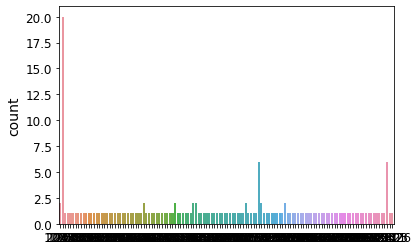

In [20]:
sns.countplot(missing)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D164EA208>,
      dtype=object)

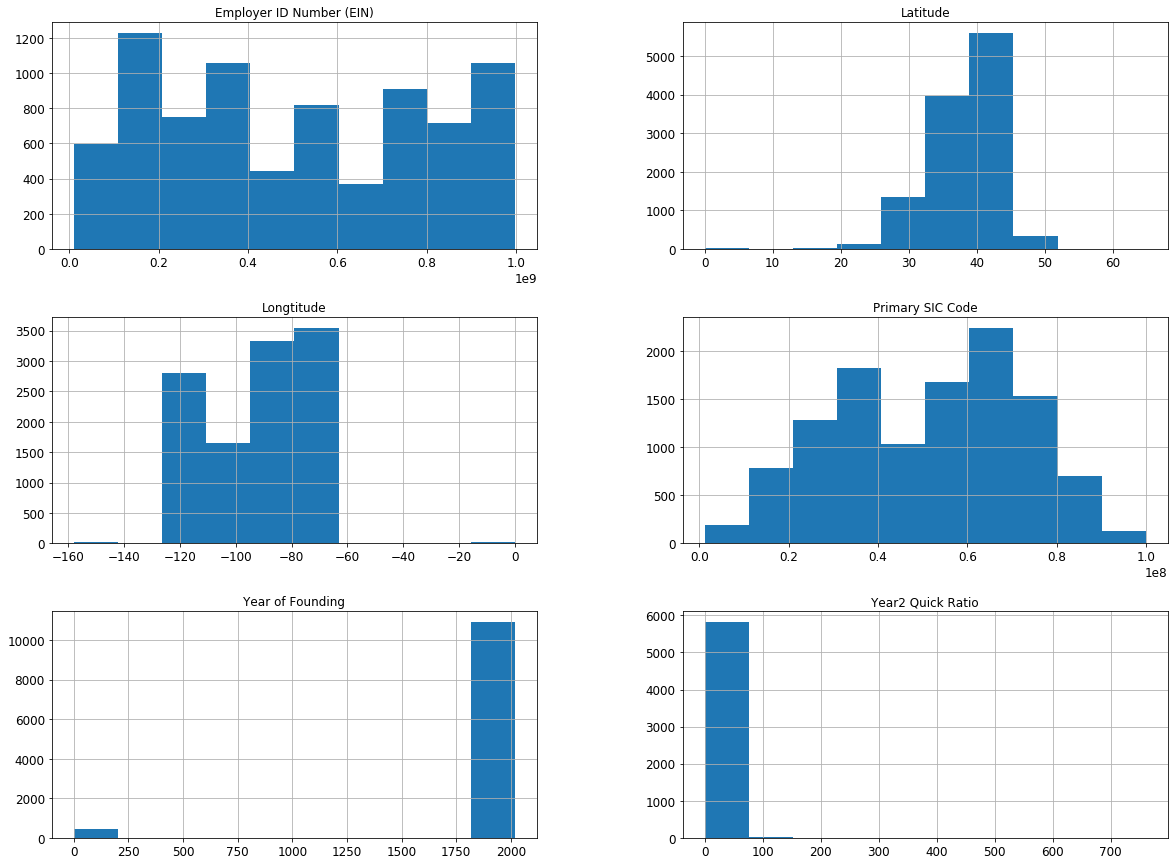

In [21]:
data.hist(figsize=(20,15))

In [24]:
# https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf

c_palette = ['tab:blue', 'tab:orange']

def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

count    1.139100e+04
mean     5.243484e+07
std      2.097569e+07
min      1.160000e+06
25%      3.621011e+07
50%      5.812031e+07
75%      6.798000e+07
max      9.999222e+07
Name: Primary SIC Code, dtype: float64
mode:  0    28340000.0
dtype: float64


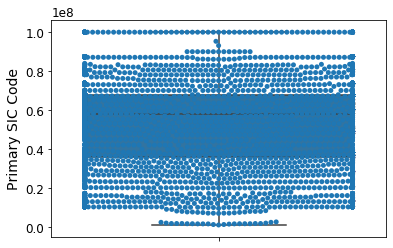

In [23]:
# univariate analysis
quantitative_summarized(dataframe= data, y= 'Primary SIC Code',palette=c_palette, verbose=False, swarm=True)


In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans